In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Part 1

In [2]:
def compute_portfolio_weights_and_risk(mu, sigma, R, m):

    S = np.diag(sigma.reshape(4,))
    Sigma = np.linalg.multi_dot([S, R, S])
    
    ones = np.array([1,1,1,1]).reshape(1,4)
    A = np.linalg.multi_dot([ones, np.linalg.inv(Sigma), ones.T])
    B = np.linalg.multi_dot([mu.T, np.linalg.inv(Sigma), ones.T])
    C = np.linalg.multi_dot([mu.T, np.linalg.inv(Sigma), mu])

    lambd = ((A * m - B) / (A*C - B**2))
    gamma = ((C - B * m) / (A*C - B**2))

    omega_star = np.dot(np.linalg.inv(Sigma), (lambd * mu + gamma * ones.T))
    sigma_Pi = np.sqrt(np.linalg.multi_dot([omega_star.T, Sigma, omega_star]))[0][0]

    weights = {f"W_{i+1}": round(w* 100, 4) for i, w in enumerate(omega_star.reshape(4,))}
    print(f'Portfolio Weights {weights}')
    print(f'Portfolio Risk {sigma_Pi*100:.4}%')

    return omega_star, sigma_Pi

In [3]:
mu = np.array([0.02, 0.07, 0.15, 0.2]).reshape(4,1)
sigma = np.array([0.05, 0.12, 0.17, 0.25]).reshape(4,1)
R = np.array([1, 0.3, 0.3, 0.3, 
              0.3, 1, 0.6, 0.6, 
              0.3, 0.6, 1, 0.6, 
              0.3, 0.6, 0.6, 1]).reshape(4,4)
omega_star, sigma_pi = compute_portfolio_weights_and_risk(mu, sigma, R, m=0.045)

Portfolio Weights {'W_1': 78.5111, 'W_2': 5.3864, 'W_3': 13.3555, 'W_4': 2.747}
Portfolio Risk 5.84%


In [4]:
R_x1_25 = np.array([1, 0.375, 0.375, 0.375, 
                    0.375, 1, 0.75, 0.75, 
                    0.375, 0.75, 1, 0.75, 
                    0.375, 0.75, 0.75, 1]).reshape(4,4)
omega_star, sigma_pi = compute_portfolio_weights_and_risk(mu, sigma, R_x1_25, m=0.045)

Portfolio Weights {'W_1': 81.8189, 'W_2': -0.9403, 'W_3': 17.8966, 'W_4': 1.2248}
Portfolio Risk 6.071%


In [5]:
R_x1_5 = np.array([1, 0.45, 0.45, 0.45, 
                   0.45, 1, 0.9, 0.9, 
                   0.45, 0.9, 1, 0.9, 
                   0.45, 0.9, 0.9, 1]).reshape(4,4)
omega_star, sigma_pi = compute_portfolio_weights_and_risk(mu, sigma, R_x1_5, m=0.045)

Portfolio Weights {'W_1': 87.6176, 'W_2': -14.613, 'W_3': 32.5701, 'W_4': -5.5748}
Portfolio Risk 6.109%


### Part 2

In [6]:
def get_weights():
    a = np.round(np.random.normal(), 4)
    b = np.round(np.random.normal() * (1-a), 4)
    c = np.round(np.random.normal() * (1-a-b), 4)
    d = 1.0-a-b-c
    weights = np.array([a, b, c, d]).reshape(4,1)
    assert abs(weights.sum() - 1.0) <= 0.001, weights
    return weights

In [7]:
def portfolio_simulation(mu, sigma, R, num_ports):
    S = np.diag(sigma.reshape(4,))
    Sigma = np.linalg.multi_dot([S, R, S])    
    
    returns = []
    vols = []
    w = []
    for _ in range(num_ports):
        weights = get_weights() #np.random.dirichlet((1, 1, 1, 1),size=1).T
        returns.append(np.dot(weights.T, mu)[0][0])
        vols.append(np.sqrt(np.linalg.multi_dot([weights.T, Sigma, weights]))[0][0])
        w.append(weights)

    df = 100*pd.DataFrame({
        'returns': returns,
        'vols': vols,
        'weights': w
        })

    return df


In [8]:
df = portfolio_simulation(mu, sigma, R, 10000)

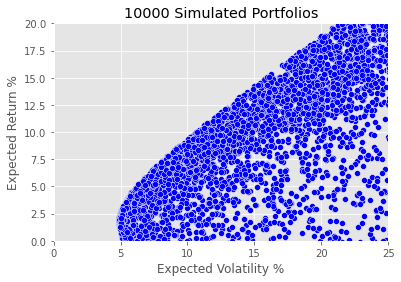

In [9]:
sns.scatterplot(data=df, x="vols", y="returns", color='blue')
plt.xlabel("Expected Volatility %")
plt.ylabel("Expected Return %")
plt.title("10000 Simulated Portfolios")
plt.xlim([0, 25.0])
plt.ylim([0, 20.0])
plt.savefig("Question_1_plot.png", format='png')

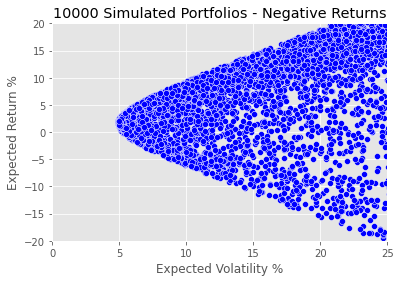

In [10]:
sns.scatterplot(data=df, x="vols", y="returns", color='blue')
plt.xlabel("Expected Volatility %")
plt.ylabel("Expected Return %")
plt.title("10000 Simulated Portfolios - Negative Returns") # You can comment this line out if you don't need title
plt.xlim([0, 25.0])
plt.ylim([-20, 20.0])
plt.savefig("Question_1_plot_2.png", format='png')